In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from crossValidation import *
from overlap_genes import * 

C:\Users\alexi\Desktop\Memory_genes\src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

In [5]:
norm = pd.read_csv ('../data/merged_data/CD8.csv')
norm = norm.set_index('Unnamed: 0').T
y = np.squeeze(np.array(pd.read_csv ('../data/merged_data/y_CD8.csv')))
print(norm.shape, y.shape)

#Save gene interest
pd.DataFrame(norm.T.index).to_csv('../data/processed_data/CD8genes_interest.csv', index = False)

(78, 14980) (78,)


# CD8

In [6]:
N = np.arange(300,1600,5)
best_subset, best_score = MIM(y, np.array(norm), FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

KeyboardInterrupt: 

In [11]:
gene_ML = np.squeeze(pd.read_csv ('../data/optimized_subsets/' + 'CD8' + 'genes_best.csv'))
norm_ML = np.array(norm.loc[:,gene_ML])
subset = np.ones((len(gene_ML),))
subsets_ML = subsampling_genes(subset, 100, 0.25)
print(norm_ML.shape)

gene_CV2 = np.squeeze(pd.read_csv ('../data/CV2genes/' + 'CD8' + '_CV2mean.csv'))
norm_CV2 = np.array(norm.loc[:,gene_CV2])
subset = np.ones((len(gene_CV2),))
subsets_CV2 = subsampling_genes(subset, 100, 0.25)
print(norm_CV2.shape)
    
#Predict family using ML and CV2 sets
model_ML = EnsemblingHierarchical(np.unique(y),compute_precision,True, subsets = subsets_ML, ensembling='voting', threshold_voting = 0.5)
result_ML = model_ML.fit_predict(X = norm_ML, y= y)
    
model_CV2 = EnsemblingHierarchical(np.unique(y),compute_precision,True, subsets = subsets_CV2, ensembling='voting', threshold_voting = 0.5)
result_CV2 = model_CV2.fit_predict(X = norm_CV2, y= y)

#Compute scores
score = [model_ML.score_, compute_sensitivity(y, result_ML), model_CV2.score_, compute_sensitivity(y, result_CV2)] 

(78, 715)
(78, 3293)


NameError: name 'scores' is not defined

In [12]:
score

[0.88, 0.9565217391304348, 0.859375, 0.9482758620689655]

C:\Users\alexi\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   40    81   102   116   132   163   167   173   195   209   249   307
   316   412   455   473   526   550   593   602   611   669   708   765
   783   838   975  1062  1084  1110  1131  1137  1145  1157  1214  1232
  1241  1330  1358  1429  1432  1473  1556  1585  1615  1739  1793  1814
  1835  1888  1958  1961  1979  2068  2079  2110  2125  2154  2231  2289
  2348  2358  2367  2370  2449  2462  2481  2485  2490  2516  2517  2539
  2583  2586  2662  2750  2782  2796  2805  2886  2887  2969  2977  2995
  3023  3129  3152  3158  3168  3201  3267  3302  3361  3391  3392  3405
  3442  3451  3484  3534  3548  3613  3660  3725  3769  3799  3823  3910
  3951  3952  3956  3999  4028  4072  4074  4088  4091  4110  4136  4223
  4254  4270  4298  4319  4370  4487  4518  4542  4675  4747  4773  4803
  4831  4871  4878  4881  4920  4937  4941  4959  4975  50

710 (0.2361111111111111, 0.9358974358974359)


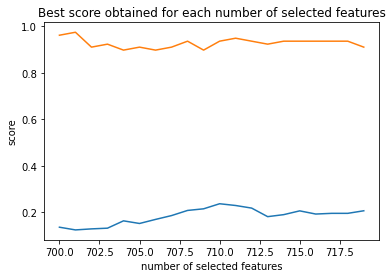

In [4]:
N = np.arange(700,720,1)
best_subset, best_score = ANOVA(y, np.array(norm), FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [9]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = np.array(norm)[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.9012345679012346 0.8846153846153846
0.8717948717948718 0.8461538461538461


In [10]:
get_best_genes_names(best_subset, '../data/processed_data/CD8genes_interest.csv', '../data/optimized_subsets/CD8genes_best.csv')

# L1210

In [15]:
norm = pd.read_csv ('../data/merged_data/L1210.csv')
norm = norm.set_index('Unnamed: 0').T
y = np.squeeze(np.array(pd.read_csv ('../data/merged_data/y_L1210.csv')))
print(norm.shape, y.shape)

#Save gene interest
pd.DataFrame(norm.T.index).to_csv('../data/processed_data/L1210genes_interest.csv', index = False)

(66, 15157) (66,)


In [16]:
gene_ML = np.squeeze(pd.read_csv ('../data/optimized_subsets/' + 'L1210' + 'genes_best.csv'))
norm_ML = np.array(norm.loc[:,gene_ML])
subset = np.ones((len(gene_ML),))
subsets_ML = subsampling_genes(subset, 100, 0.25)
print(norm_ML.shape)

gene_CV2 = np.squeeze(pd.read_csv ('../data/CV2genes/' + 'L1210' + '_CV2mean.csv'))
norm_CV2 = np.array(norm.loc[:,gene_CV2])
subset = np.ones((len(gene_CV2),))
subsets_CV2 = subsampling_genes(subset, 100, 0.25)
print(norm_CV2.shape)
    
#Predict family using ML and CV2 sets
model_ML = EnsemblingHierarchical(np.unique(y),compute_precision,True, subsets = subsets_ML, ensembling='voting', threshold_voting = 0.5)
result_ML = model_ML.fit_predict(X = norm_ML, y= y)
    
model_CV2 = EnsemblingHierarchical(np.unique(y),compute_precision,True, subsets = subsets_CV2, ensembling='voting', threshold_voting = 0.5)
result_CV2 = model_CV2.fit_predict(X = norm_CV2, y= y)

#Compute scores
score = [model_ML.score_, compute_sensitivity(y, result_ML), model_CV2.score_, compute_sensitivity(y, result_CV2)]

(66, 216)
(66, 2711)


In [17]:
score

[1.0, 0.9076923076923077, 0.9166666666666666, 0.9166666666666666]

In [ ]:
N = np.arange(300,1500,25)
best_subset, best_score = MIM(y, np.array(norm), FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [ ]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = norm[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

216 (0.9682539682539683, 0.8636363636363636)


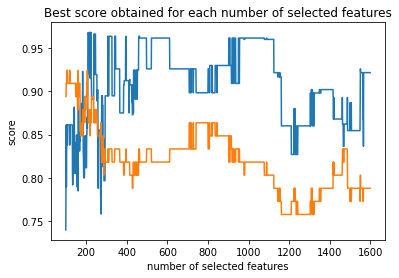

In [17]:
N = np.arange(100,1600,1)
best_subset, best_score = ANOVA(y, norm, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [18]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = norm[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.9682539682539683 0.8636363636363636
1.0 0.8333333333333334


In [19]:
get_best_genes_names(best_subset, '../data/processed_data/L1210genes_interest.csv', '../data/optimized_subsets/L1210genes_best.csv')